# Introduction to Polynomial Regression

<a href="https://drive.google.com/file/d/1EZ_xqMaYj77vErVnrQmnFOj-VBEoO5uW/view" target="_blank">
     <img src="http://www.deltanalytics.org/uploads/2/6/1/4/26140521/screen-shot-2019-01-05-at-4-48-29-pm_orig.png" width="500" height="400">
</a>

The univariate (one dependent variable) and multivariate (more than one dependent variable) linear regression we have discussed so far always assumes a linear relationship between the independent and dependent variables.  In the real world, it is very common to have data where there is a non-linear relationship between the independent and dependent variables.  In these cases, we can use polynomial regression where we assume the relationship between the independent variable x and the dependent variable(s) y is modelled as an nth degree polynomial in x.

For example, we learned in lecture that the relationship between number of miles walked per day and age can be modeled by a quadratic equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
kms = np.random.normal(5, 2, 50)
ages = np.random.normal(40,13,50)
ages = [a if a > 0 else -a for a in ages]

In [3]:
first_kms = sorted(kms[0:int(round(len(kms)/2,0))])
second_kms = sorted(kms[int(round(len(kms)/2,0)):len(kms)], reverse=True)

ages = sorted(ages)
kms = first_kms + second_kms
print(len(kms))
print(len(ages))

50
50


In [4]:
df = pd.DataFrame({"age": ages, "kilometers": kms})

In [5]:
df.head() # Note: Use .head to see the top of your df so you do not have to scroll through the whole df

,age,kilometers
0,6.325717,0.514630
1,8.794103,0.957490
2,21.204469,1.906189
3,21.774347,2.618049
4,25.015432,3.558823


Text(0.5, 0, 'Age')

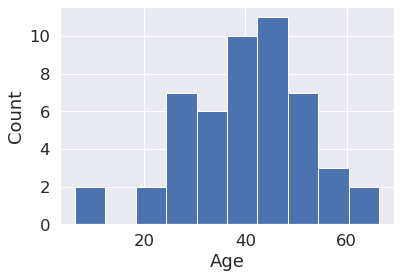

In [6]:
plt.hist(df['age'])
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Distance in KM')

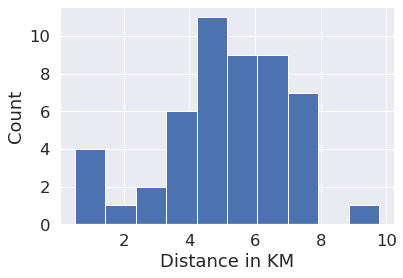

In [7]:
plt.hist(df['kilometers'])
plt.ylabel('Count')
plt.xlabel('Distance in KM')

Text(0.5, 1.0, 'Scatter plot of kilometers walked in a day vs age')

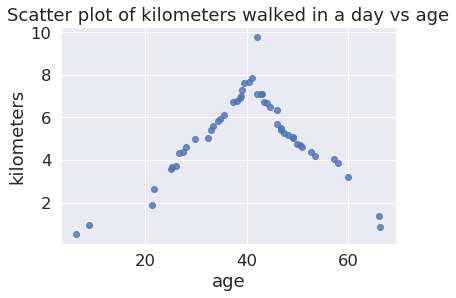

In [8]:
# plot kilometers vs. age
ax = sns.regplot(x='age', y='kilometers', data=df, fit_reg=False)
ax.set_title('Scatter plot of kilometers walked in a day vs age')

Does the above relationship look linear to you?  If no, what kind of relationship do you think it is?

</br>
</br>
</br>

Let's try to fit a parabola (a 2-degree polynomial) to the data

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'kilometers'
y = df[y_column]
# Define our independent variables
x_columns = ['age']
X = df[x_columns]

# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training = pd.concat([pd.DataFrame({'kilometers' : y_train}), X_train], axis=1)

model = sm.ols(formula = 'kilometers ~ np.power(age, 2) + age', data = training).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     57.38
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           4.57e-12
Time:                        21:51:05   Log-Likelihood:                -52.635
No. Observations:                  40   AIC:                             111.3
Df Residuals:                      37   BIC:                             116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1822      0.881  

No handles with labels found to put in legend.


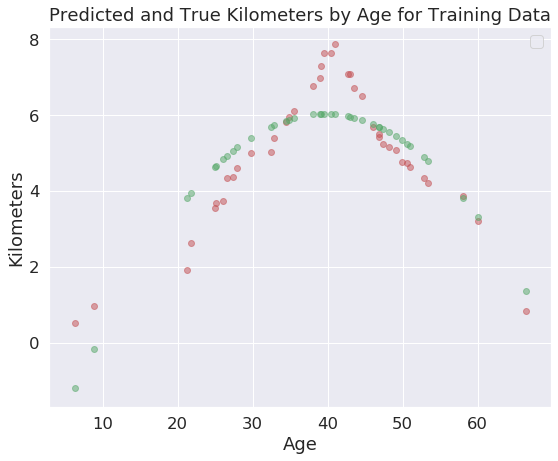

In [10]:
# Get predictions for the training data and plot
training['preds'] = model.predict(training['age'])

plt.figure(figsize=(9,7))
plt.scatter(training['age'], training['kilometers'], alpha=0.5, c='r')
plt.scatter(training['age'], training['preds'], alpha=0.5, c='g')
plt.title('Predicted and True Kilometers by Age for Training Data')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.legend()
plt.show();


In [11]:
p = model.params

Finish this notebook to fit the model to the test data.  How is the fit?